# Example notebook for Ensemble of 2D (lon-lat) diagnostic 2-meter temperature 

##### This notebook demonsterates how the ensemble module can be used for 2D (lon-lat) 2 meter temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import sys
# sys.path.insert(0, '../../')
import xarray as xr
from ensemble import EnsembleLatLon

In [2]:
# The individual ensemble memebers datasets has to be merged in a Dataset before using the EnsembleLatLon class
def merge_dataset(var=None, models_list= None, ens_dim="Ensembles"):
    dataset_list = []
    if models_list is None:
        raise NoDataError("No models provided")
    else:
        for i, data in enumerate(models_list):
            dataset_list.append(data)
    merged_dataset = xr.concat(dataset_list, ens_dim)
    del data
    del dataset_list
    #gc.collect()
    return merged_dataset

In [3]:
# data paths on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc
# IFS-FESOM: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc 

In [4]:
# loading the data as xarray Datasets

# loading the atmglobalmean Datasets 
IFS_NEMO_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-NEMO_historical-1990.nc')
IFS_FESOM_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/atmglobalmean/netcdf/atmglobalmean.statistics_maps.2t.IFS-FESOM_historical-1990.nc')
model_list = [IFS_NEMO_data, IFS_FESOM_data]

In [5]:
atm_dataset = merge_dataset(var='2t',models_list=model_list)

In [6]:
atmglobalmean_ens = EnsembleLatLon(var='2t', dataset=atm_dataset)

In [7]:
atmglobalmean_ens.edit_attributes(figure_size=[15,10],cbar_label='2-meter temperature')

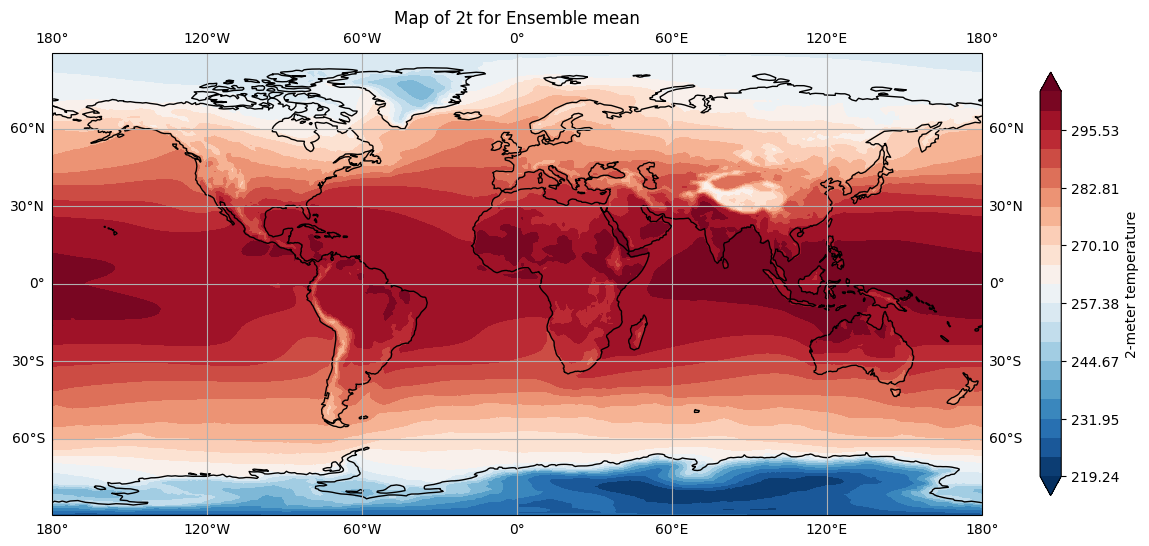

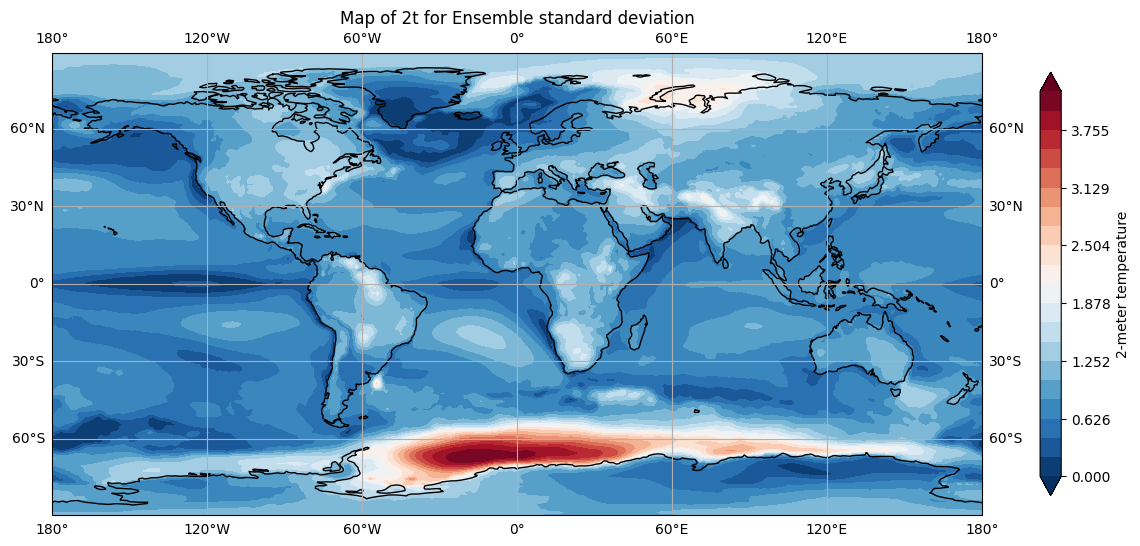

In [8]:
atmglobalmean_ens.run()